<a href="https://colab.research.google.com/github/Pranaviate/MachineLearningNotebooks/blob/master/LogicReg_SkiLearn_DecisionPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#Generating dataset
"""we will use custom dataset generated by make_blobs() function in
datasets of sklearn"""

x,y=datasets.make_blobs(n_samples=1000, 
                        centers=2, 
                        n_features=2, 
                        random_state=1,
                        cluster_std=3)


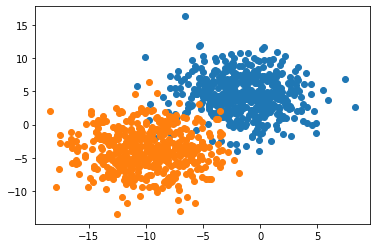

In [4]:
#Creating a scatterplot

for class_value in range(2):
  #get row indexes for samples with this class
  row_ix=np.where(y== class_value)

  #create scatter of these samples
  plt.scatter(x[row_ix,0], x[row_ix,1])

#show plot
plt.show()

In [5]:
regressor = LogisticRegression()

#fit the regressor into X and Y
regressor.fit(x,y)

#apply the predict method
y_pred = regressor.predict(x)

In [6]:
accuracy =accuracy_score(y, y_pred)
print('Accuracy:{}'.format(accuracy))


Accuracy:0.972


In [7]:
##Generating decision surface

#define the grid of points x of y in the feature space
min1, max1= x[:,0].min()-1, x[:,0].max()+1 #1st feature
min2, max2= x[:,1].min()-1, x[:,1].max()+1 #2nd feature

#scaling coordinates
x1_scale= np.arange(min1, max1, 0.1)
x2_scale= np.arange(min2, max2, 0.1)

In [8]:
#converting x1_scale, x2_scale to grid
x_grid, y_grid=np.meshgrid(x1_scale, x2_scale)

In [9]:
#flatten each grid to a vector
x_g,y_g = x_grid.flatten(),y_grid.flatten()
x_g,y_g = x_g.reshape((len(x_g),1)),y_g.reshape((len(y_g),1))

In [10]:
grid=np.hstack((x_g,y_g))

In [11]:
#make predictions for the grid
y_pred_2=regressor.predict(grid)

#predict the probability
p_pred=regressor.predict_proba(grid)

#keep just the probabilities for class 0
p_pred=p_pred[:,0]

#reshaping the results
p_pred.shape
pp_grid=p_pred.reshape(x_grid.shape)

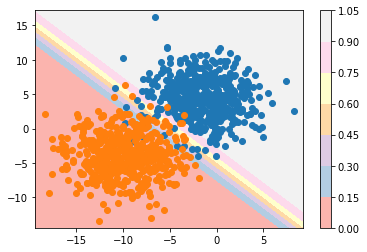

In [12]:
#plot the grid of x,y and z values as a surface
surface =plt.contourf(x_grid,y_grid,pp_grid, cmap='Pastel1')
plt.colorbar(surface)

#create scatter plot for samples from each class
for class_value in range(2):
  #get row indexes for samples with this class
  row_ix=np.where(y==class_value)
  #create scatter of these samples
  plt.scatter(x[row_ix,0],x[row_ix,1], cmap='Pastel1')

#show the plot
plt.show()

In [16]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [13]:
!ls

 sample_data  'Social_Network_Ads (1).csv'   Social_Network_Ads.csv


In [14]:
socialdata=pd.read_csv('Social_Network_Ads.csv')
socialdata_mod=socialdata.select_dtypes(['number'])

In [15]:
socialdata_mod.head()


,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [16]:
x=socialdata_mod.iloc[:,:-1].values
y=socialdata_mod.iloc[:,-1].values

#splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=0)

In [17]:
#As age and salary are not in the same scale
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [18]:
classifier=LogisticRegression(random_state=0)

#fitting classifier to training data
classifier.fit(x_train,y_train)

#predicting the value of y
y_pred=classifier.predict(x_test)

In [19]:
x_set, y_set=sc.inverse_transform(x_train), y_train

In [ ]:
##THIS WILL ONLY WORK WITH PC THAT HAS A LARGER RAM

#1. reverse the standard scaler on the X_train
x_set, y_set = sc.inverse_transform(x_train), y_train
#2. Generate decision surface boundaries
min1, max1 = x_set[:, 0].min() - 10, x_set[:, 0].max() + 10 # for Age
min2, max2 = x_set[:, 1].min() - 1000, x_set[:, 1].max() + 1000 # for salary
#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)
#4. Convert into vector 
x1, x2 = np.meshgrid(x_scale, y_scale)
#5. Flatten X1 and X2 and return the output as a numpy array
x_flatten = np.array([x1.ravel(), x2.ravel()])
#6. Transfor the results into it's original form before scaling
x_transformed = sc.transform(x_flatten.T)
#7. Generate the prediction and reshape it to the X to have the same shape
z_pred = classifier.predict(x_transformed).reshape(x1.shape)
#8. set the plot size
plt.figure(figsize=(20,10))
#9. plot the contour function
plt.contourf(x1, x2, z_pred,
                     alpha = 0.75, 
                     cmap = ListedColormap(('#386cb0', '#f0027f')))
#10. setting the axes limit
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
#11. plot the points scatter plot ( [salary, age] vs. predicted classification based on training set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), 
                label = j)
    
#12. plot labels and adjustments
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()